<a href="https://colab.research.google.com/github/Mahdi-Golizadeh/my_tf_xp/blob/main/tf_multi_output_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

--2023-02-15 16:58:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76189 (74K) [application/x-httpd-php]
Saving to: ‘ENB2012_data.xlsx’

ENB2012_data.xlsx   100%[===================>]  74.40K  --.-KB/s    in 0.1s    

2023-02-15 16:58:39 (582 KB/s) - ‘ENB2012_data.xlsx’ saved [76189/76189]



In [3]:
df = pd.read_excel("/content/ENB2012_data.xlsx")

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
train, test = train_test_split(df, test_size= .1)

In [7]:
train_y_1 = train.pop("Y1")
train_y_2 = train.pop("Y2")
test_y_1 = test.pop("Y1")
test_y_2 = test.pop("Y2")

In [8]:
data_desc = train.describe()

In [9]:
train

,X1,X2,X3,X4,X5,X6,X7,X8
491,0.86,588.0,294.0,147.0,7.0,5,0.25,5
372,0.66,759.5,318.5,220.5,3.5,2,0.25,2
537,0.86,588.0,294.0,147.0,7.0,3,0.40,1
441,0.86,588.0,294.0,147.0,7.0,3,0.25,4
8,0.86,588.0,294.0,147.0,7.0,2,0.00,0
...,...,...,...,...,...,...,...,...
220,0.71,710.5,269.5,220.5,3.5,2,0.10,4
283,0.64,784.0,343.0,220.5,3.5,5,0.10,5
203,0.86,588.0,294.0,147.0,7.0,5,0.10,4
509,0.71,710.5,269.5,220.5,3.5,3,0.25,5


In [10]:
train_y_1 = np.array(train_y_1)
train_y_2 = np.array(train_y_2)
test_y_1 = np.array(test_y_1)
test_y_2 = np.array(test_y_2)

In [11]:
data_desc.transpose()

,count,mean,std,min,25%,50%,75%,max
X1,691.0,0.765832,0.106631,0.62,0.69,0.74,0.86,0.98
X2,691.0,670.505789,88.476886,514.50,588.00,686.00,735.00,808.50
X3,691.0,317.010854,43.241916,245.00,294.00,318.50,343.00,416.50
X4,691.0,176.747467,45.342040,110.25,122.50,220.50,220.50,220.50
X5,691.0,5.237337,1.751222,3.50,3.50,3.50,7.00,7.00
X6,691.0,3.500724,1.118196,2.00,2.50,4.00,4.00,5.00
X7,691.0,0.236179,0.133137,0.00,0.10,0.25,0.40,0.40
X8,691.0,2.801737,1.543494,0.00,2.00,3.00,4.00,5.00


In [12]:
train_data_normal = (train - data_desc.transpose()["mean"]) / data_desc.transpose()["std"]
test_data_normal = (test - data_desc.transpose()["mean"]) / data_desc.transpose()["std"]

In [13]:
len(train.columns)

8

In [14]:
input_layer = tf.keras.layers.Input(shape= len(train.columns), name= "inp_1")
first_dense = tf.keras.layers.Dense(units= 64, 
                                    activation= tf.keras.activations.tanh, name= "dns_1")(input_layer)
second_dense = tf.keras.layers.Dense(units= 64, 
                                    activation= tf.keras.activations.tanh, name= "dns_2")(first_dense)

y_1_out = tf.keras.layers.Dense(units= 1, 
                                name= "y_1")(second_dense)

third_dense = tf.keras.layers.Dense(units= 32,
                                    activation= tf.keras.activations.tanh,
                                    name= "dns_3")(second_dense)

y_2_out = tf.keras.layers.Dense(units= 1, 
                                name= "y_2")(third_dense)

model = tf.keras.models.Model(
    inputs= input_layer,
    outputs= [y_1_out, y_2_out]
)

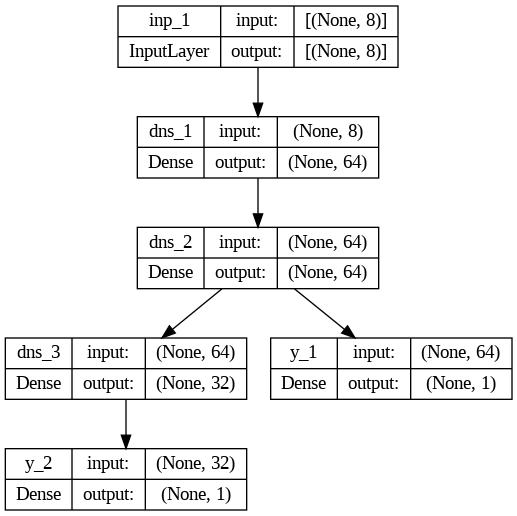

In [15]:
tf.keras.utils.plot_model(
    model, show_shapes= True, show_layer_names= True, to_file= "model.png"
)

In [17]:
optimizer = tf.keras.optimizers.Adam()
losses = {
    "y_1": tf.keras.losses.mse,
    "y_2": tf.keras.losses.mse
}
metrics = {
    "y_1": tf.keras.metrics.MeanSquaredError(),
    "y_2": tf.keras.metrics.MeanSquaredError()
}
model.compile(
    optimizer = optimizer,
    loss = losses,
    metrics = metrics,
)

In [18]:
history = model.fit(
    train_data_normal, (train_y_1, train_y_2),
    epochs= 500,
    batch_size= 10,
    validation_data= (test_data_normal, (test_y_1, test_y_2)),
)

Epoch 1/500
70/70 [==============================] - 3s 7ms/step - loss: 1153.6995 - y_1_loss: 534.5870 - y_2_loss: 619.1127 - y_1_mean_squared_error: 534.5870 - y_2_mean_squared_error: 619.1127 - val_loss: 1073.4093 - val_y_1_loss: 509.8259 - val_y_2_loss: 563.5834 - val_y_1_mean_squared_error: 509.8259 - val_y_2_mean_squared_error: 563.5834
Epoch 2/500
70/70 [==============================] - 0s 4ms/step - loss: 744.3784 - y_1_loss: 366.9776 - y_2_loss: 377.4008 - y_1_mean_squared_error: 366.9776 - y_2_mean_squared_error: 377.4008 - val_loss: 566.7166 - val_y_1_loss: 268.5949 - val_y_2_loss: 298.1218 - val_y_1_mean_squared_error: 268.5949 - val_y_2_mean_squared_error: 298.1218
Epoch 3/500
70/70 [==============================] - 0s 3ms/step - loss: 386.1759 - y_1_loss: 154.6290 - y_2_loss: 231.5468 - y_1_mean_squared_error: 154.6290 - y_2_mean_squared_error: 231.5469 - val_loss: 336.8250 - val_y_1_loss: 109.8508 - val_y_2_loss: 226.9742 - val_y_1_mean_squared_error: 109.8508 - val_y_

In [22]:
history.history.keys()

dict_keys(['loss', 'y_1_loss', 'y_2_loss', 'y_1_mean_squared_error', 'y_2_mean_squared_error', 'val_loss', 'val_y_1_loss', 'val_y_2_loss', 'val_y_1_mean_squared_error', 'val_y_2_mean_squared_error'])

In [23]:
y_predict = model.predict(test_data_normal)

3/3 [==============================] - 0s 6ms/step


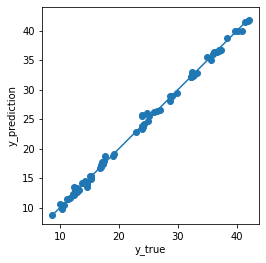

In [35]:
plt.scatter(test_y_1, y_predict[0])
plt.xlabel("y_true")
plt.ylabel("y_prediction")
plt.axis("equal")
plt.axis("square")
plt.plot([min(test_y_1), max(test_y_1)], [min(test_y_1), max(test_y_1)])
plt.show()

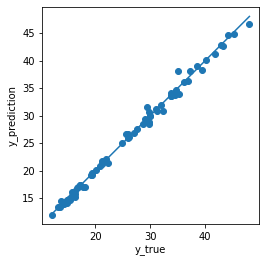

In [36]:
plt.scatter(test_y_2, y_predict[1])
plt.xlabel("y_true")
plt.ylabel("y_prediction")
plt.axis("equal")
plt.axis("square")
plt.plot([min(test_y_2), max(test_y_2)], [min(test_y_2), max(test_y_2)])
plt.show()

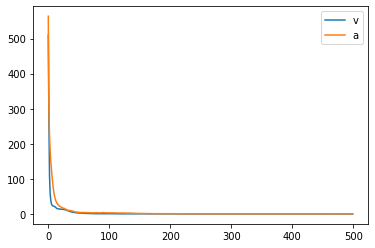

In [42]:
plt.plot(history.history["val_y_1_mean_squared_error"])
plt.legend("val_y_1_mean_squared_error")
plt.plot(history.history["val_y_2_mean_squared_error"])
plt.legend("val_y_2_mean_squared_error")
plt.show()